# Exploring the Titanic Dataset

Exploratory analysis using the Titanic dataset.

Read more about the titanic dataset here: https://www.kaggle.com/c/titanic

In [10]:
import pandas as pd

In [5]:
import pandas as pd

titanic_df = pd.read_csv("../Datasets/titanic-dataset.csv")

In [16]:
import pandas as pd

pd.set_option('precision', 3)
titanic_df = pd.read_csv("../Datasets/titanic-dataset.csv")


OptionError: Pattern matched multiple keys

In [12]:
import os
import pandas as pd
file_path = os.path.join("..", "datasets", "titanic-dataset.csv")
titanic_df = pd.read_csv(file_path)

# Data Exploration

Have a look at the dataset. These should be the variables in it:
    
    * survival: Survival (0 = No; 1 = Yes)
    * pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * name: Name
    * sex: Sex
    * age: Age
    * sibsp: Number of Siblings/Spouses Aboard
    * parch: Number of Parents/Children Aboard
    * ticket: Ticket Number
    * fare: Passenger Fare
    * cabin: Cabin
    * embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
        
**pclass**: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

### Excercise 1: Data cleanup

Identify quantitative, categorical and ordinal variables.

Identify if there are columns with missing values and decide how to deal with them.

You could either remove the column, or replace the missing values with a sensible **robust** estimate

In [2]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:


# Step 1: Identify variable types (classification in comments)
# Quantitative: Age, Fare, SibSp, Parch
# Categorical: Sex, Embarked, Survived, Cabin, Ticket
# Ordinal: Pclass

# Step 2: Check for missing values
missing_values = titanic_df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Step 3: Handle missing values
# Fill missing Age with median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

# Drop Cabin column due to too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Step 4: Verify cleanup
print("Missing values after cleanup:")
print(titanic_df.isnull().sum())



Columns with missing values:
Age         177
Cabin       687
Embarked      2
dtype: int64
Missing values after cleanup:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Why This Works
Using titanic_df['Age'] = titanic_df['Age'].fillna(...) directly modifies the column without any ambiguity about chained assignments.
This approach avoids the FutureWarning and ensures your code remains compatible with future versions of pandas.

## Exercise 2: How Survival is correlated to other attributes of the dataset ? Find out the correlation coefficient.

You can also draw plots showing the correlation coefficient between variable

In [14]:
ATTRS = ["Age", "SibSp","Parch", "Fare"]
# scatter matrix

Correlation of Survival with other attributes:
Survived    1.000000
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64


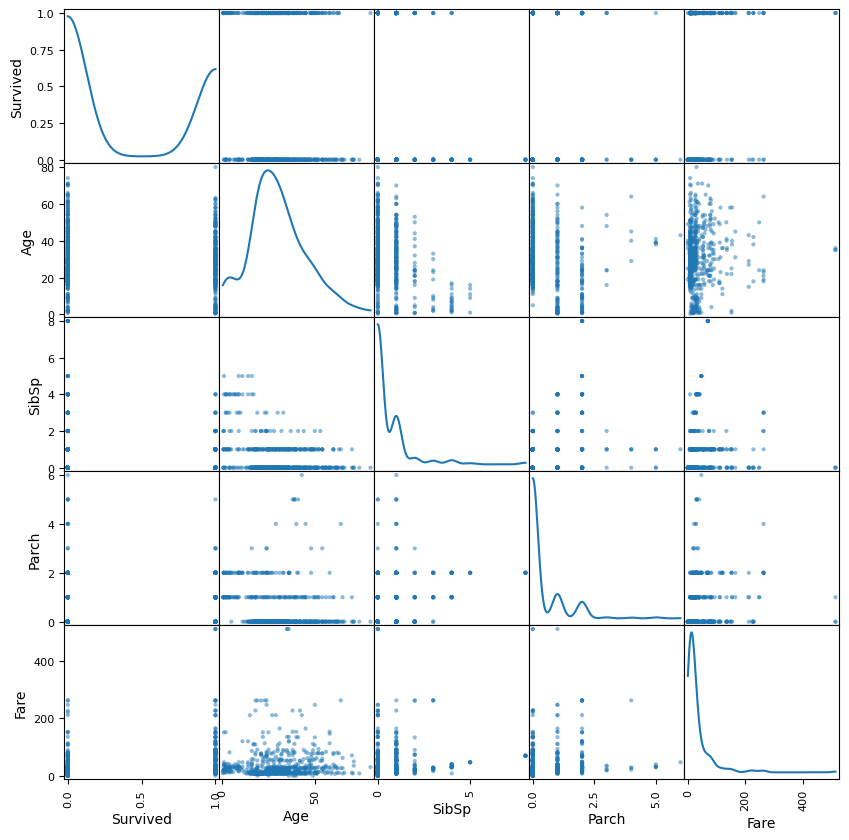

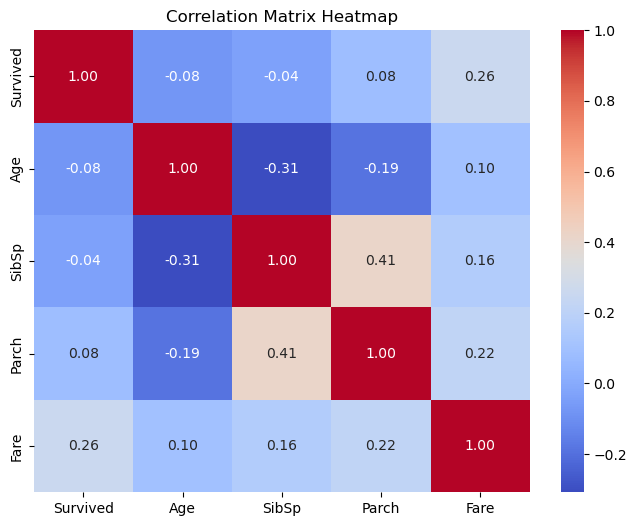

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Load Titanic dataset
file_path = os.path.join("..", "datasets", "titanic-dataset.csv")
titanic_df = pd.read_csv(file_path)

# Select relevant attributes
ATTRS = ["Survived", "Age", "SibSp", "Parch", "Fare"]

# Step 1: Compute correlation matrix
correlation_matrix = titanic_df[ATTRS].corr()
print("Correlation of Survival with other attributes:")
print(correlation_matrix["Survived"])

# Step 2: Visualize correlations

# Scatter matrix
scatter_matrix(titanic_df[ATTRS], figsize=(10, 10), alpha=0.5, diagonal='kde')
plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Key Insights
Correlation Coefficients:

Positive values indicate that as one variable increases, survival likelihood increases.
Negative values suggest the opposite.
Visualization:

The scatter matrix shows pairwise distributions and relationships.
The heatmap provides a clearer overview of correlation strengths.

## Exercise 3: Did Sex play a role in Survival?

Advanced: you could also make sure that there are no other factors (e.g. age) confounding the impact of sex in survival.

For instance if a greater share of women than men were very old and their survival rate were lower this may be due to age factors rather than to sex.

Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


/var/folders/gg/y7njvgln6bd7wj2ygfmd_r580000gn/T/ipykernel_21839/3397830700.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=titanic_df, ci=None)


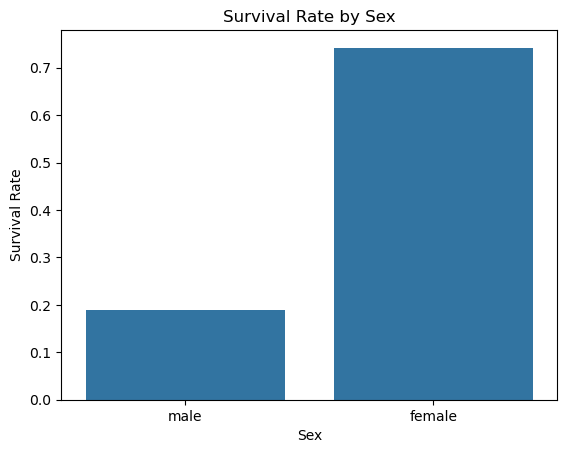

Survival rate by Sex and Age Group:
Sex     AgeGroup   
female  Child          0.593750
        Teen           0.750000
        Young Adult    0.783333
        Adult          0.732143
        Senior         0.941176
male    Child          0.567568
        Teen           0.088235
        Young Adult    0.180672
        Adult          0.206186
        Senior         0.127660
Name: Survived, dtype: float64


/var/folders/gg/y7njvgln6bd7wj2ygfmd_r580000gn/T/ipykernel_21839/3397830700.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_sex_age = titanic_df.groupby(["Sex", "AgeGroup"])["Survived"].mean()
/var/folders/gg/y7njvgln6bd7wj2ygfmd_r580000gn/T/ipykernel_21839/3397830700.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="AgeGroup", y="Survived", hue="Sex", data=titanic_df, kind="bar", ci=None)


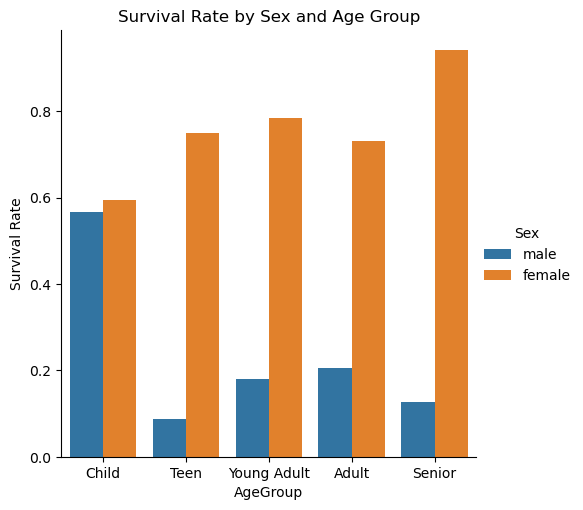

In [16]:
# Step 1: Survival Rates by Sex
survival_by_sex = titanic_df.groupby("Sex")["Survived"].mean()
print("Survival rate by Sex:")
print(survival_by_sex)

# Step 2: Visualize Survival Rates by Sex
sns.barplot(x="Sex", y="Survived", data=titanic_df, ci=None)
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

# Step 3: Check for Confounding Factors (Age)
# Create Age Groups
titanic_df["AgeGroup"] = pd.cut(
    titanic_df["Age"], bins=[0, 12, 18, 35, 50, 80], labels=["Child", "Teen", "Young Adult", "Adult", "Senior"]
)

# Group by Sex and AgeGroup, calculate survival rates
survival_by_sex_age = titanic_df.groupby(["Sex", "AgeGroup"])["Survived"].mean()
print("Survival rate by Sex and Age Group:")
print(survival_by_sex_age)

# Step 4: Visualize Survival by Sex and Age Group
sns.catplot(x="AgeGroup", y="Survived", hue="Sex", data=titanic_df, kind="bar", ci=None)
plt.title("Survival Rate by Sex and Age Group")
plt.ylabel("Survival Rate")
plt.show()

Expected Insights
Sex Role in Survival:
Survival rates for females are generally much higher than for males.
Age as a Confounder:
If survival rates are consistently higher for females across all age groups, age is unlikely to be a major confounder.

## Exercise 4: Did class played role in survival ?

Survival rate by Class (Pclass):
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


/var/folders/gg/y7njvgln6bd7wj2ygfmd_r580000gn/T/ipykernel_21839/2629458954.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=titanic_df, ci=None)


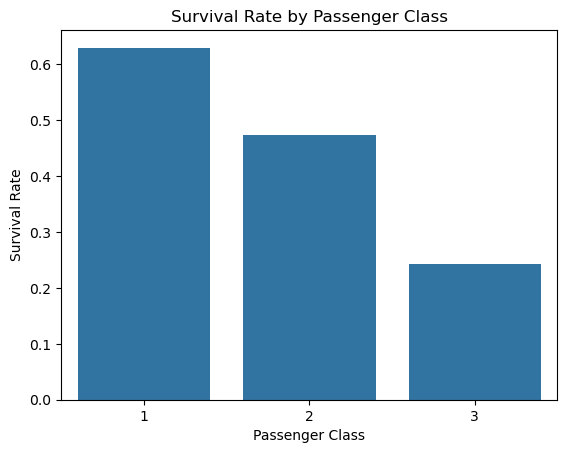

Survival rate by Class and Sex:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64
Survival rate by Class and Age Group:
Pclass  AgeGroup   
1       Child          0.750000
        Teen           0.916667
        Young Adult    0.757576
        Adult          0.615385
        Senior         0.461538
2       Child          1.000000
        Teen           0.500000
        Young Adult    0.436170
        Adult          0.457143
        Senior         0.200000
3       Child          0.416667
        Teen           0.282609
        Young Adult    0.232323
        Adult          0.094340
        Senior         0.100000
Name: Survived, dtype: float64


/var/folders/gg/y7njvgln6bd7wj2ygfmd_r580000gn/T/ipykernel_21839/2629458954.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_age = titanic_df.groupby(["Pclass", "AgeGroup"])["Survived"].mean()
/var/folders/gg/y7njvgln6bd7wj2ygfmd_r580000gn/T/ipykernel_21839/2629458954.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df, kind="bar", ci=None)


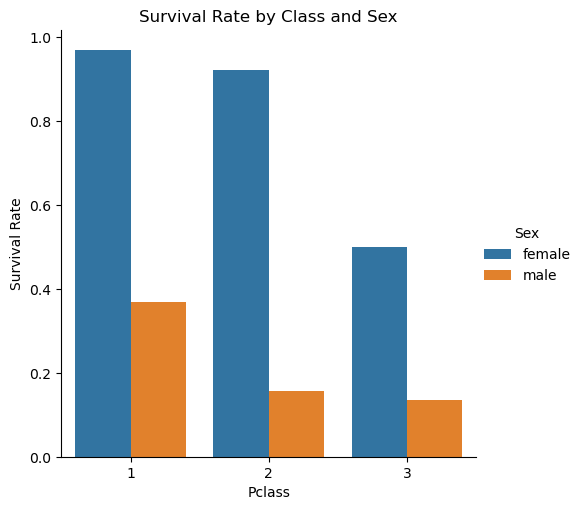

/var/folders/gg/y7njvgln6bd7wj2ygfmd_r580000gn/T/ipykernel_21839/2629458954.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x="Pclass", y="Survived", hue="AgeGroup", data=titanic_df, kind="bar", ci=None)


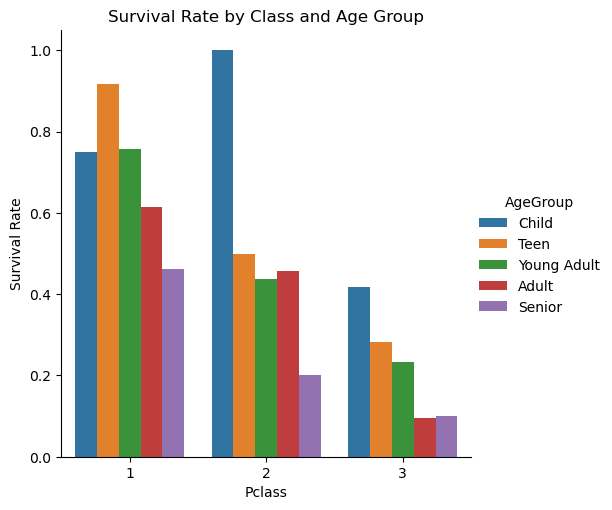

In [17]:
# Step 1: Compute Survival Rates by Class
survival_by_class = titanic_df.groupby("Pclass")["Survived"].mean()
print("Survival rate by Class (Pclass):")
print(survival_by_class)

# Step 2: Visualize Survival Rates by Class
sns.barplot(x="Pclass", y="Survived", data=titanic_df, ci=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# Step 3: Check for Confounding Factors
# Survival by Class and Sex
survival_by_class_sex = titanic_df.groupby(["Pclass", "Sex"])["Survived"].mean()
print("Survival rate by Class and Sex:")
print(survival_by_class_sex)

# Survival by Class and Age Group
titanic_df["AgeGroup"] = pd.cut(
    titanic_df["Age"], bins=[0, 12, 18, 35, 50, 80], labels=["Child", "Teen", "Young Adult", "Adult", "Senior"]
)
survival_by_class_age = titanic_df.groupby(["Pclass", "AgeGroup"])["Survived"].mean()
print("Survival rate by Class and Age Group:")
print(survival_by_class_age)

# Visualization
sns.catplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df, kind="bar", ci=None)
plt.title("Survival Rate by Class and Sex")
plt.ylabel("Survival Rate")
plt.show()

sns.catplot(x="Pclass", y="Survived", hue="AgeGroup", data=titanic_df, kind="bar", ci=None)
plt.title("Survival Rate by Class and Age Group")
plt.ylabel("Survival Rate")
plt.show()

Expected Insights
Survival by Class:
Higher classes (1st) typically have higher survival rates than lower classes (3rd).
Sex as a Confounder:
Women in higher classes may have significantly better survival rates than men in lower classes.
Age as a Confounder:
Children in 1st and 2nd classes may have better survival rates than adults or seniors in 3rd class.

## Exercise 5: Did being alone onboard play a role in survival ?

Think of how you can extract the alone variable from the existing ones.